# Description

It reads GWAS files and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Settings

In [3]:
PROJECTS_TRAIT_KEY <- "CHRONOTYPE"

In [4]:
# Parameters
PHENOPLIER_NOTEBOOK_FILEPATH <- "projects/chronotype/nbs/05_gwas/10-gwas-qqplot.ipynb"

# Paths

In [5]:
DATA_DIR <- Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_DATA_DIR"))

In [6]:
DATA_DIR

[1] "/opt/data/projects/chronotype/data"

In [7]:
INPUT_GWAS_DIR <- file.path(DATA_DIR, "gwas")

In [8]:
INPUT_GWAS_DIR

[1] "/opt/data/projects/chronotype/data/gwas"

# Load trait info file

In [9]:
trait_info <- read_csv(Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_TRAITS_INFO_FILE")), col_names = TRUE)

Rows: 1 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): id, gwas_file
dbl (1): sample_size
lgl (1): n_cases

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
trait_info

id,gwas_file,sample_size,n_cases
<chr>,<chr>,<dbl>,<lgl>
chronotype,chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt.gz,449734,NA


# Chronotype

In [11]:
gwas_title <- "Chronotype"

## Get GWAS file

In [12]:
row <- which(trait_info$id == "chronotype")
gwas_filename <- trait_info[[row, "gwas_file"]]

In [13]:
gwas_filename

[1] "chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt.gz"

## Load data

In [14]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, gwas_filename)))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  SNP = col_character(),
  CHR = col_double(),
  BP = col_double(),
  ALLELE1 = col_character(),
  ALLELE0 = col_character(),
  A1FREQ = col_double(),
  INFO = col_double(),
  BETA = col_double(),
  SE = col_double(),
  P_BOLT_LMM = col_double(),
  HWE_P = col_double()
)



In [15]:
dim(gwas)

[1] 11977111       11

In [16]:
head(gwas)

,SNP,CHR,BP,ALLELE1,ALLELE0,A1FREQ,INFO,BETA,SE,P_BOLT_LMM,HWE_P
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs10399793,1,49298,T,C,0.37639100,0.342797,-0.003118480,0.00476442,0.52,0.825830
2,rs2462492,1,54676,C,T,0.59914400,0.340158,-0.000357407,0.00472086,0.96,0.633757
3,rs3107975,1,55326,T,C,0.99160400,0.324228,0.009961290,0.02645130,0.72,0.405636
4,1:70728_C_T,1,70728,C,T,0.99784100,0.365713,0.025184000,0.04774620,0.73,0.666235
5,rs2462495,1,79033,A,G,0.00126204,0.536566,0.026157100,0.06140000,0.65,0.411469
6,rs114608975,1,86028,T,C,0.89641400,0.340885,0.009769640,0.00755128,0.24,0.992579


In [17]:
gwas <- gwas %>% filter(P_BOLT_LMM >= 0 & P_BOLT_LMM <= 1)

In [18]:
dim(gwas)

[1] 11977111       11

## Stats

In [19]:
summary(gwas)

     SNP                 CHR               BP              ALLELE1         
 Length:11977111    Min.   : 1.000   Min.   :      173   Length:11977111   
 Class :character   1st Qu.: 4.000   1st Qu.: 32631424   Class :character  
 Mode  :character   Median : 8.000   Median : 69477752   Mode  :character  
                    Mean   : 8.645   Mean   : 78837797                     
                    3rd Qu.:13.000   3rd Qu.:114512942                     
                    Max.   :22.000   Max.   :249238520                     
   ALLELE0              A1FREQ            INFO             BETA           
 Length:11977111    Min.   :0.0010   Min.   :0.2844   Min.   :-2.557e-01  
 Class :character   1st Qu.:0.7594   1st Qu.:0.9060   1st Qu.:-5.970e-03  
 Mode  :character   Median :0.9642   Median :0.9831   Median : 1.047e-05  
                    Mean   :0.8330   Mean   :0.9372   Mean   : 2.383e-05  
                    3rd Qu.:0.9955   3rd Qu.:0.9960   3rd Qu.: 6.003e-03  
                  

## Manhattan plot

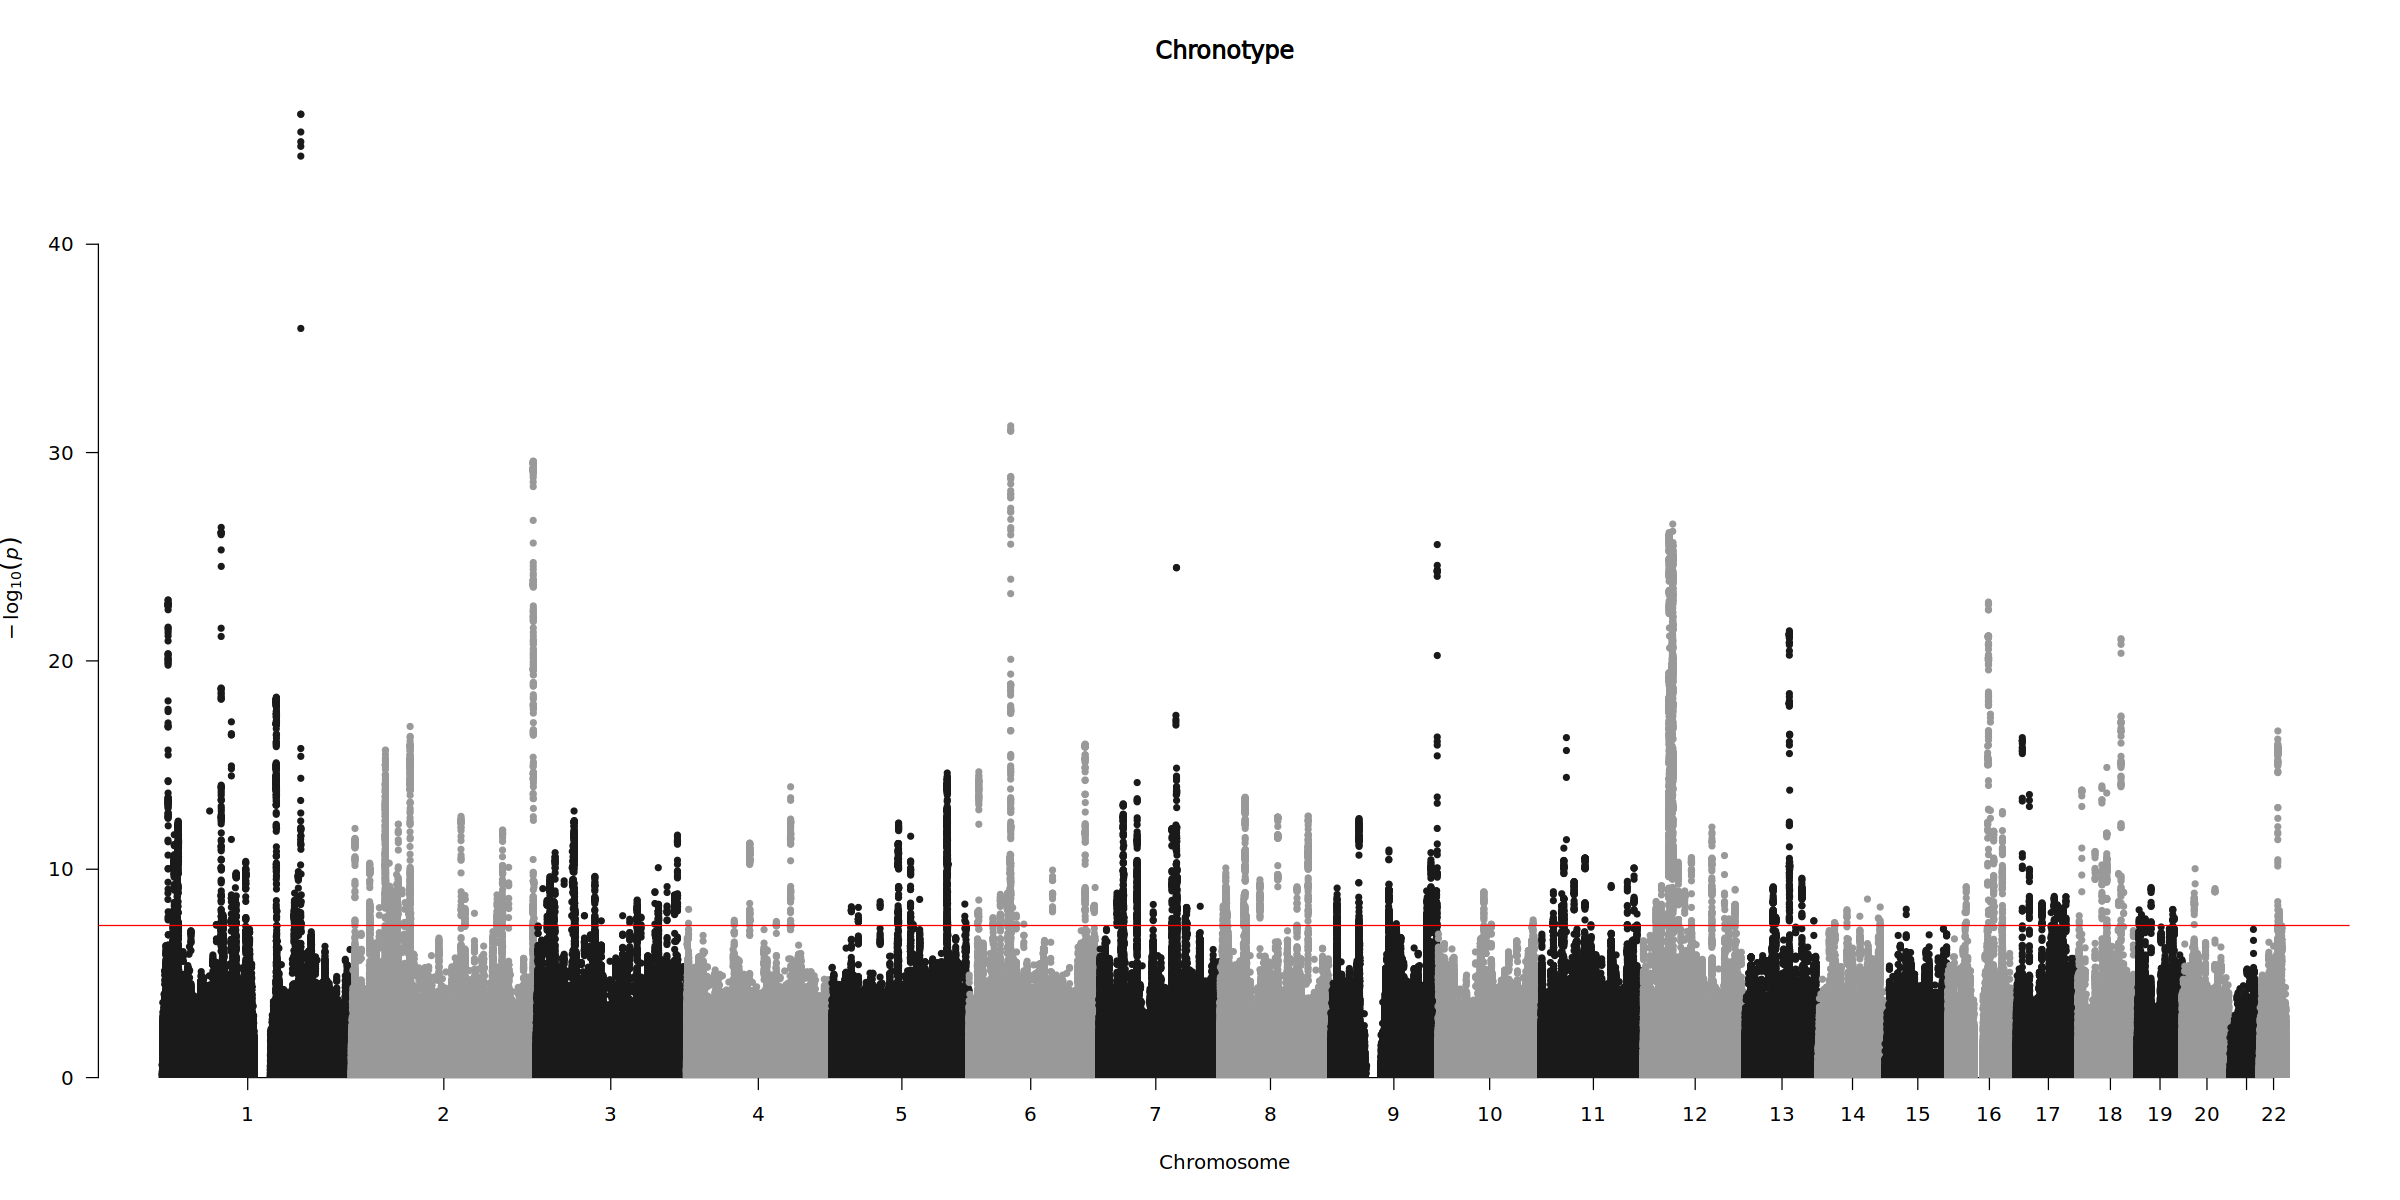

In [20]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "CHR",
  bp = "BP",
  p = "P_BOLT_LMM",
  snp = "SNP",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  # cex = 0.6,
  # cex.axis = 0.9,
)

## QQ-plot

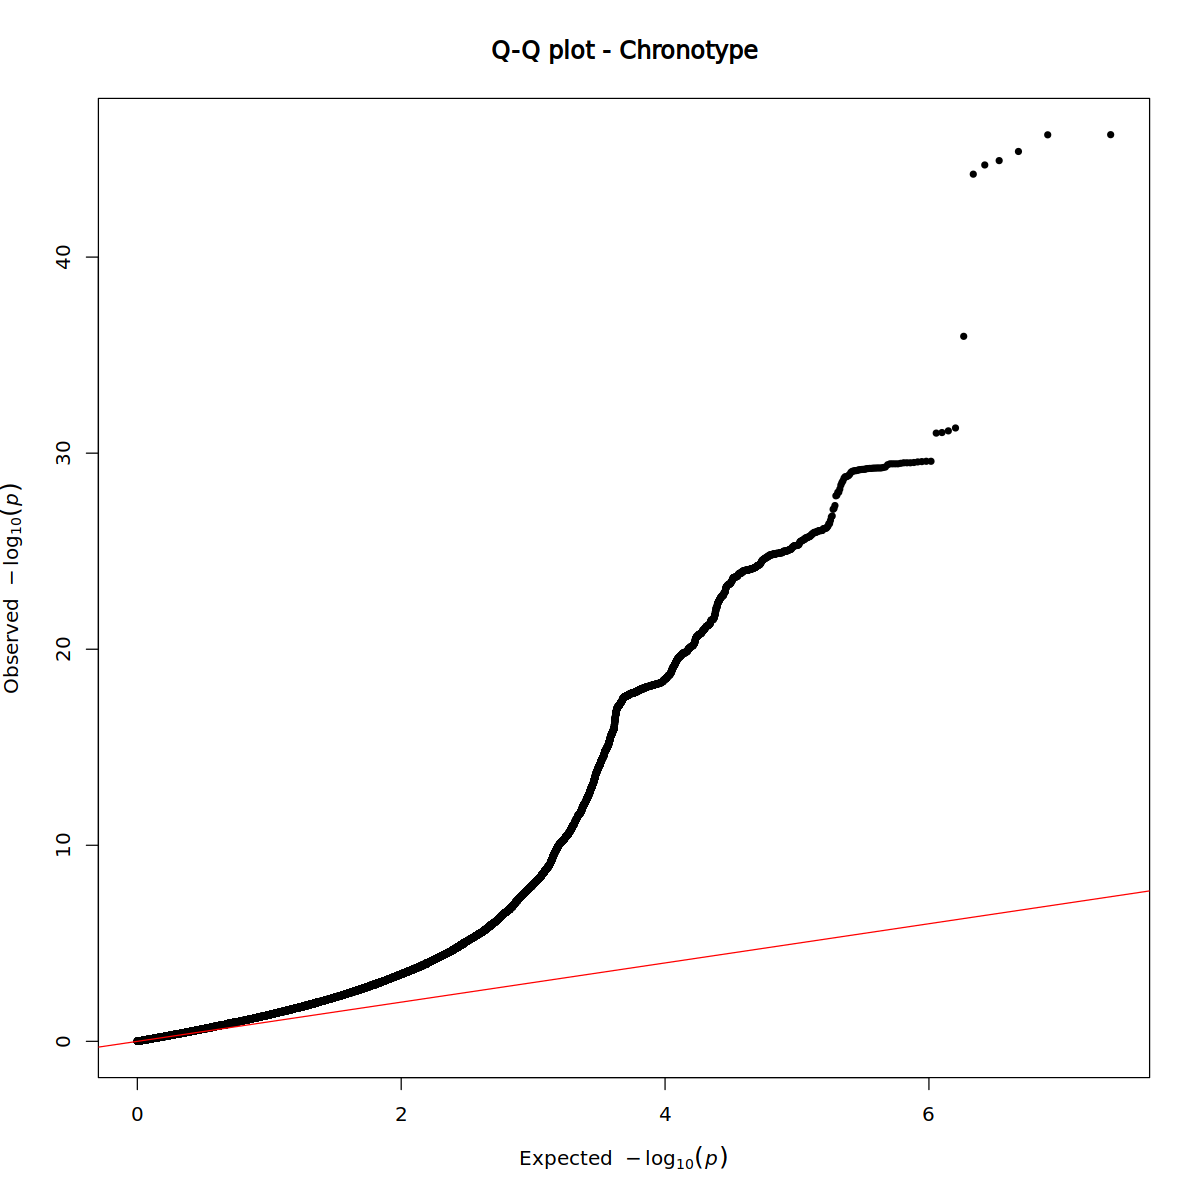

In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$P_BOLT_LMM,
  main = paste0("Q-Q plot - ", gwas_title)
)